In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Train/test split

In [2]:
provinces = ['BKK','Chiangmai','Khonkaen','Rayong','Saraburi','Surat']
province = provinces[4]

In [3]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training.sample(5)

,date_time,PM2.5,temp,wind speed,wind dir,lat,long
5897,2018-03-03 17:00:00,25.0,35.2,17.0,210.0,14.685833,100.871996
8115,2018-06-04 03:00:00,17.0,28.6,7.0,225.0,14.685833,100.871996
26149,2020-06-24 13:00:00,19.0,33.8,12.0,205.0,14.685833,100.871996
12117,2018-11-17 21:00:00,57.0,26.6,25.0,105.0,14.685833,100.871996
2563,2017-10-15 19:00:00,37.0,26.4,19.0,220.0,14.685833,100.871996


In [4]:
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)
data_training.head()

,PM2.5,temp,wind speed,wind dir
0,22.0,25.0,38.0,250.0
1,16.0,25.0,38.0,250.0
2,13.0,25.0,38.0,250.0
3,18.0,25.0,38.0,250.0
4,29.0,25.0,38.0,250.0


In [5]:
data_test = pd.read_csv(province+'_clean.csv', date_parser = True)
data_test.sample(5)

,Unnamed: 0,date_time,PM2.5,temp,wind speed,wind dir,lat,long
6824,6824,2021-04-11 08:00:00,52.0,26.7,19,75,14.685833,100.871996
8673,8673,2021-06-27 09:00:00,17.0,30.4,22,225,14.685833,100.871996
1903,1903,2020-09-18 07:00:00,27.0,25.9,19,315,14.685833,100.871996
1763,1763,2020-09-12 11:00:00,24.0,30.4,9,165,14.685833,100.871996
1017,1017,2020-08-12 09:00:00,19.0,25.7,27,260,14.685833,100.871996


In [6]:
data_test = data_test.drop(['Unnamed: 0', 'lat', 'long'], axis = 1)
data_test.head()

,date_time,PM2.5,temp,wind speed,wind dir
0,2020-07-01 00:00:00,2.0,25.9,41,250
1,2020-07-01 01:00:00,NaN,25.5,41,255
2,2020-07-01 02:00:00,NaN,25.5,41,255
3,2020-07-01 03:00:00,3.0,25.5,41,255
4,2020-07-01 04:00:00,5.0,25.1,49,265


## Normalize data

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)

In [8]:
scaler.inverse_transform(data_training)

array([[ 22. ,  25. ,  38. , 250. ],
       [ 16. ,  25. ,  38. , 250. ],
       [ 13. ,  25. ,  38. , 250. ],
       ...,
       [ 16. ,  27.4,  31. , 245. ],
       [ 11. ,  25.9,  41. , 250. ],
       [  7. ,  25.9,  41. , 250. ]])

In [9]:
scale = 1/scaler.scale_
temp = (data_training * scale) + scaler.min_
temp

array([[ 20.99753695,  10.4795539 ,  38.        , 250.        ],
       [ 14.99753695,  10.4795539 ,  38.        , 250.        ],
       [ 11.99753695,  10.4795539 ,  38.        , 250.        ],
       ...,
       [ 14.99753695,  12.8795539 ,  31.        , 245.        ],
       [  9.99753695,  11.3795539 ,  41.        , 250.        ],
       [  5.99753695,  11.3795539 ,  41.        , 250.        ]])

In [10]:
data_training[0:10]

array([[0.05172414, 0.40892193, 0.41758242, 0.69444444],
       [0.03694581, 0.40892193, 0.41758242, 0.69444444],
       [0.02955665, 0.40892193, 0.41758242, 0.69444444],
       [0.04187192, 0.40892193, 0.41758242, 0.69444444],
       [0.06896552, 0.40892193, 0.41758242, 0.69444444],
       [0.07635468, 0.40892193, 0.41758242, 0.69444444],
       [0.0862069 , 0.40892193, 0.41758242, 0.69444444],
       [0.06650246, 0.40892193, 0.41758242, 0.69444444],
       [0.04187192, 0.40892193, 0.41758242, 0.69444444],
       [0.02216749, 0.40892193, 0.41758242, 0.69444444]])

In [11]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(26244, 60, 4)

# Building Model1: LSTM

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [14]:
tf.__version__

'2.8.0'

In [15]:
modelLSTM = Sequential()

modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(LSTM(units = 120, activation = 'relu'))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(Dense(units = 1))

In [16]:
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15600     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [18]:
#create callback
filepath = 'my_best_modelLSTM_yourself.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(
    monitor='loss', 
    patience=3, 
    min_delta=0, 
    mode='auto'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=0
)
callbacks = [checkpoint, earlystopping, reduce_lr]

In [19]:
modelLSTM.compile(optimizer='adam', loss = 'mean_squared_error')

In [20]:
history = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=callbacks)

Epoch 1/10
821/821 [==============================] - 252s 299ms/step - loss: 0.0017 - lr: 0.0010
Epoch 2/10
821/821 [==============================] - 309s 376ms/step - loss: 0.0013 - lr: 0.0010
Epoch 3/10
821/821 [==============================] - 372s 453ms/step - loss: 0.0010 - lr: 0.0010
Epoch 4/10
821/821 [==============================] - 373s 454ms/step - loss: 7.9103e-04 - lr: 0.0010
Epoch 5/10
821/821 [==============================] - 262s 319ms/step - loss: 5.9411e-04 - lr: 0.0010
Epoch 6/10
821/821 [==============================] - 220s 268ms/step - loss: 5.0983e-04 - lr: 0.0010
Epoch 7/10
821/821 [==============================] - 255s 311ms/step - loss: 4.6432e-04 - lr: 0.0010
Epoch 8/10
821/821 [==============================] - 212s 258ms/step - loss: 4.5616e-04 - lr: 0.0010
Epoch 9/10
821/821 [==============================] - 234s 285ms/step - loss: 4.3461e-04 - lr: 0.0010
Epoch 10/10
821/821 [==============================] - 208s 254ms/step - loss: 3.9680e-04 - lr

# Testing

In [21]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)

In [ ]:
data_training.tail(60)

In [22]:
data_test = data_test.drop(['date_time'], axis = 1)
data_test.head()

,PM2.5,temp,wind speed,wind dir
0,2.0,25.9,41,250
1,NaN,25.5,41,255
2,NaN,25.5,41,255
3,3.0,25.5,41,255
4,5.0,25.1,49,265


## Prepare testing data

In [23]:
past_60_days = data_training.tail(60)

In [24]:
df = past_60_days.append(data_test, ignore_index = True)
df.head()

,PM2.5,temp,wind speed,wind dir
0,18.0,30.5,9.0,235.0
1,18.0,33.1,12.0,245.0
2,14.0,33.1,12.0,245.0
3,8.0,33.1,12.0,245.0
4,6.0,33.4,17.0,245.0


In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(7836, 4)

In [27]:
inputs = scaler.transform(df)
inputs

array([[0.04187192, 0.6133829 , 0.0989011 , 0.65277778],
       [0.04187192, 0.71003717, 0.13186813, 0.68055556],
       [0.0320197 , 0.71003717, 0.13186813, 0.68055556],
       ...,
       [0.02955665, 0.58364312, 0.26373626, 0.65277778],
       [0.0320197 , 0.58364312, 0.27472527, 0.66666667],
       [0.0320197 , 0.58364312, 0.26373626, 0.69444444]])

In [28]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [29]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((7776, 60, 4), (7776,))

## Model prediction

In [30]:
y_pred = modelLSTM.predict(X_test)

In [31]:
y_pred

array([[0.02687798],
       [0.02151454],
       [0.02405663],
       ...,
       [0.03645606],
       [0.0372601 ],
       [0.03662656]], dtype=float32)

In [32]:
scaler.scale_

array([0.00246305, 0.03717472, 0.01098901, 0.00277778])

In [33]:
scale = 1/scaler.scale_[0]
scale

406.0

In [34]:
y_pred = y_pred*scale
y_test = y_test*scale

In [35]:
import math
from sklearn.metrics import mean_squared_error

print(province+' RMSE =', math.sqrt(mean_squared_error(y_test, y_pred)) )

Saraburi RMSE = 3.6197448256774423


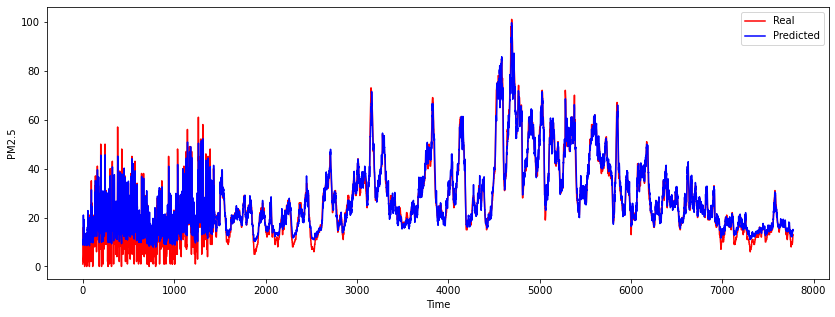

In [36]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [37]:
import pickle

with open('lstm_'+province.lower()+'.pickle', 'wb') as fp:
    pickle.dump(y_pred, fp)

In [38]:
df1 = pd.DataFrame(y_pred)

In [39]:
df1.to_csv('lstm_'+province.lower()+'.csv')